In [2]:
# Monte Carlo para encontrar la mejor combinación de pesos
import sys
sys.path.append("../src")

import sys, os, json, random
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(".."))

from src.models import StudentProfile, KnowledgeGraph
from src.algorithm import genetic_optimize
from src.evaluation import calculate_fitness, is_valid_plan

import pandas as pd




In [3]:
# 📥 Cargar datos del estudiante y el grafo de conocimiento
with open("../data/student_profile.json") as f:
    student_data = json.load(f)
student = StudentProfile(**student_data, objectives_file="../data/objectives.json")

with open("../data/knowledge_graph_expandido.json") as f:
    graph_data = json.load(f)
graph = KnowledgeGraph(graph_data)

In [4]:
# 🎲 Función para generar pesos que sumen 1
def generate_weights():
    a, b, c, d = [random.random() for _ in range(4)]
    total = a + b + c + d
    return {
        "alpha": a / total,
        "beta": b / total,
        "gamma": c / total,
        "delta": d / total
    }

In [5]:
# ⚙️ Ejecutar 5000 iteraciones del método Monte Carlo
N = 5000
n, m = 4, 2
results = []
best_score = float('-inf')
best_plan = None
best_weights = None

for _ in range(N):
    weights = generate_weights()
    plan, score = genetic_optimize(student, graph, n=n, m=m, pop_size=30, generations=20, weights=weights)

    if plan:
        results.append({**weights, "fitness": score})
        if score > best_score:
            best_score = score
            best_plan = plan
            best_weights = weights

[Gen 0] Planes válidos: 1
[Gen 1] Planes válidos: 30
[Gen 2] Planes válidos: 0
⚠ No se encontraron planes válidos.
[Gen 0] Planes válidos: 0
⚠ No se encontraron planes válidos.
[Gen 0] Planes válidos: 0
⚠ No se encontraron planes válidos.
[Gen 0] Planes válidos: 1
[Gen 1] Planes válidos: 0
⚠ No se encontraron planes válidos.
[Gen 0] Planes válidos: 0
⚠ No se encontraron planes válidos.
[Gen 0] Planes válidos: 1
[Gen 1] Planes válidos: 0
⚠ No se encontraron planes válidos.
[Gen 0] Planes válidos: 1
[Gen 1] Planes válidos: 0
⚠ No se encontraron planes válidos.
[Gen 0] Planes válidos: 1
[Gen 1] Planes válidos: 30
[Gen 2] Planes válidos: 0
⚠ No se encontraron planes válidos.
[Gen 0] Planes válidos: 0
⚠ No se encontraron planes válidos.
[Gen 0] Planes válidos: 2
[Gen 1] Planes válidos: 16
[Gen 2] Planes válidos: 0
⚠ No se encontraron planes válidos.
[Gen 0] Planes válidos: 0
⚠ No se encontraron planes válidos.
[Gen 0] Planes válidos: 1
[Gen 1] Planes válidos: 0
⚠ No se encontraron planes vá

In [7]:
# 💾 Guardar los resultados
df = pd.DataFrame(results)
df.to_csv("../data/montecarlo_resultados.csv", index=False)

with open("../data/mejor_plan_montecarlo.json", "w") as f:
    json.dump({
        "fitness": best_score,
        "weights": best_weights,
        "plan": best_plan.assignment
    }, f, indent=2)

print("✅ Mejor combinación encontrada:")
print("Pesos:", best_weights)
print("Fitness:", best_score)

✅ Mejor combinación encontrada:
Pesos: {'alpha': 0.5558909602765315, 'beta': 0.04660247200567484, 'gamma': 0.39390366241184177, 'delta': 0.003602905305951746}
Fitness: 0.9852751476399374


📈 1. Distribución del Fitness (Monte Carlo)

    Este gráfico muestra la distribución de valores de fitness obtenidos durante las 5000 iteraciones del método Monte Carlo. Permite visualizar cuántas combinaciones de pesos generaron planes con bajo, medio o alto nivel de adecuación según la función objetivo.

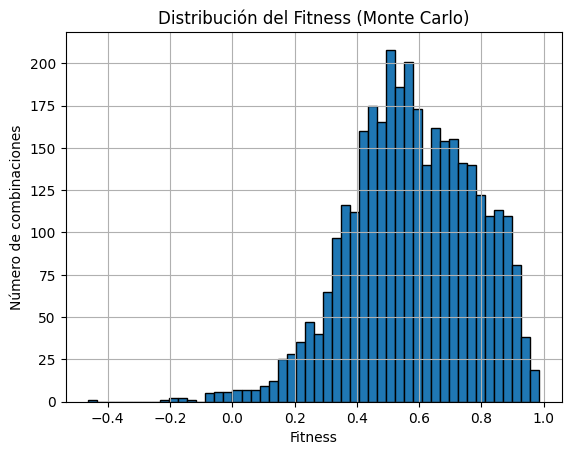

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("../data/montecarlo_resultados.csv")

plt.hist(df["fitness"], bins=50, edgecolor="black")
plt.title("Distribución del Fitness (Monte Carlo)")
plt.xlabel("Fitness")
plt.ylabel("Número de combinaciones")
plt.grid(True)
plt.show()


📊 2. Relación entre cada peso (α, β, γ, δ) y el Fitness

    Cada gráfico de dispersión explora cómo influye un peso individual (alpha, beta, gamma, delta) en la calidad del plan generado (fitness). Nos ayuda a entender si priorizar el conocimiento nuevo, las preferencias del estudiante, el objetivo profesional o la dificultad tiene mayor impacto en el resultado.

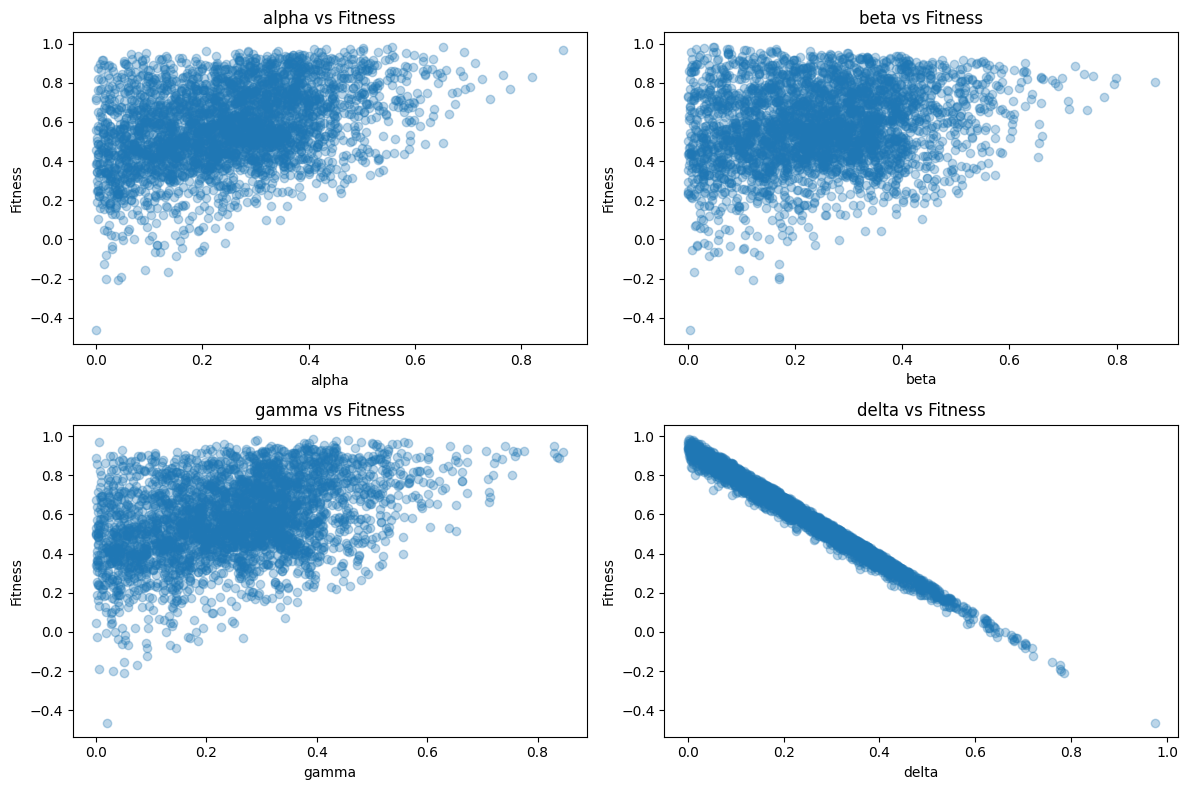

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
pesos = ["alpha", "beta", "gamma", "delta"]

for i, p in enumerate(pesos):
    axs[i // 2][i % 2].scatter(df[p], df["fitness"], alpha=0.3)
    axs[i // 2][i % 2].set_title(f"{p} vs Fitness")
    axs[i // 2][i % 2].set_xlabel(p)
    axs[i // 2][i % 2].set_ylabel("Fitness")

plt.tight_layout()
plt.show()


🧭 3. Frente de Pareto: Gamma vs Alpha (coloreado por Fitness)

    Este gráfico muestra las 100 mejores combinaciones encontradas (por fitness), proyectadas en el espacio Gamma (objetivo académico) vs Alpha (conocimiento nuevo). Cada punto está coloreado según su fitness. Sirve para visualizar cómo se equilibra el aprendizaje nuevo y la orientación a metas dentro de las soluciones más efectivas.

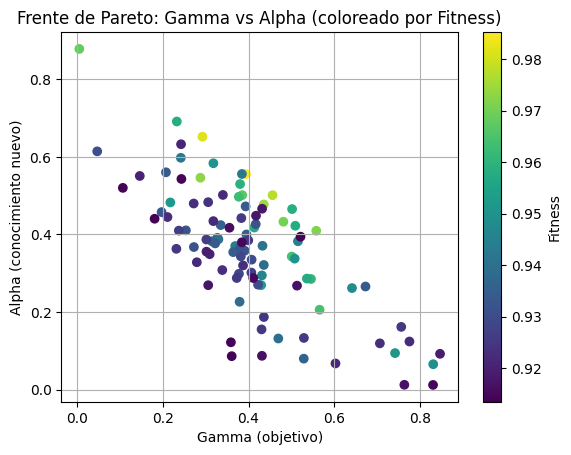

In [10]:
pareto_front = df.sort_values("fitness", ascending=False).head(100)
plt.scatter(pareto_front["gamma"], pareto_front["alpha"], c=pareto_front["fitness"], cmap="viridis")
plt.title("Frente de Pareto: Gamma vs Alpha (coloreado por Fitness)")
plt.xlabel("Gamma (objetivo)")
plt.ylabel("Alpha (conocimiento nuevo)")
plt.colorbar(label="Fitness")
plt.grid(True)
plt.show()
